In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
dataset = pd.read_csv('Nutrition.csv')
data = pd.DataFrame(dataset)

In [ ]:

# Checking the first few rows of the data again to identify specific columns that need attention
sample_data = data.head()

# Tailoring data handling steps

# 1. Handling Missing Data
# Identifying columns with a high percentage of missing values
missing_data = data.isnull().mean().sort_values(ascending=False)

# Filling missing values for columns with less than a certain threshold (e.g., 50%) of missing data
# For columns with more than 50% missing data, consider dropping them or handling them differently
threshold = 0.5
columns_to_fill = missing_data[missing_data < threshold].index
for col in columns_to_fill:
    if data[col].dtype in ['float64', 'int64']:
        data[col].fillna(data[col].mean(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)  # Filling with mode for categorical columns

# 2. Validating Data Accuracy
# As an example, ensure that percentage values (like Data_Value) are within 0 and 100
data = data[data['Data_Value'].between(0, 100, inclusive='both')]

# 3. Transforming Variables for Consistency
# Example: Creating a new categorical variable based on a numerical variable
# Let's create a categorical variable for 'Data_Value' to categorize obesity rates
data['Obesity_Rate_Category'] = pd.cut(data['Data_Value'], bins=[0, 20, 40, 60, 80, 100],
                                        labels=["Very Low", "Low", "Medium", "High", "Very High"])

missing_data

Data_Value_Unit               1.000000
Total                         0.964289
Gender                        0.928579
Data_Value_Footnote_Symbol    0.900958
Data_Value_Footnote           0.900958
Education                     0.857157
Age(years)                    0.785736
Income                        0.750025
Race/Ethnicity                0.714315
Data_Value                    0.099042
Data_Value_Alt                0.099042
Low_Confidence_Limit          0.099042
High_Confidence_Limit         0.099042
Sample_Size                   0.099042
GeoLocation                   0.018639
Stratification1               0.000102
StratificationCategory1       0.000102
StratificationCategoryId1     0.000102
StratificationID1             0.000102
YearEnd                       0.000000
Data_Value_Type               0.000000
Question                      0.000000
Topic                         0.000000
Class                         0.000000
ClassID                       0.000000
TopicID                  

In [ ]:
# Dropping columns that are redundant (i.e., have a low number of unique values)

# Checking the number of unique values in each column
unique_values = data.nunique()

# Determining a threshold for dropping columns. For example, if a column has only one unique value, it might be redundant.
redundancy_threshold = 1

# Identifying columns to drop
columns_to_drop = unique_values[unique_values <= redundancy_threshold].index

# Dropping these columns
data_dropped = data.drop(columns=columns_to_drop)

# Displaying the columns dropped and the first few rows of the updated dataframe
columns_dropped_info = columns_to_drop, data_dropped.head()
columns_dropped_info

(Index(['Datasource', 'Data_Value_Unit', 'Data_Value_Type',
        'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'Total',
        'DataValueTypeID'],
       dtype='object'),
    YearStart  YearEnd LocationAbbr LocationDesc                    Class  \
 0       2020     2020           US     National        Physical Activity   
 1       2014     2014           GU         Guam  Obesity / Weight Status   
 2       2013     2013           US     National  Obesity / Weight Status   
 3       2013     2013           US     National  Obesity / Weight Status   
 4       2015     2015           US     National        Physical Activity   
 
                           Topic  \
 0  Physical Activity - Behavior   
 1       Obesity / Weight Status   
 2       Obesity / Weight Status   
 3       Obesity / Weight Status   
 4  Physical Activity - Behavior   
 
                                             Question  Data_Value  \
 0  Percent of adults who engage in no leisure-tim...        30.6  

In [ ]:
data_dropped.head(1)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value,Data_Value_Alt,Low_Confidence_Limit,...,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1,Obesity_Rate_Category
0,2020,2020,US,National,Physical Activity,Physical Activity - Behavior,Percent of adults who engage in no leisure-tim...,30.6,30.6,29.4,...,"(18.220833, -66.590149)",PA,PA1,Q047,59,Race/Ethnicity,Hispanic,RACE,RACEHIS,Low


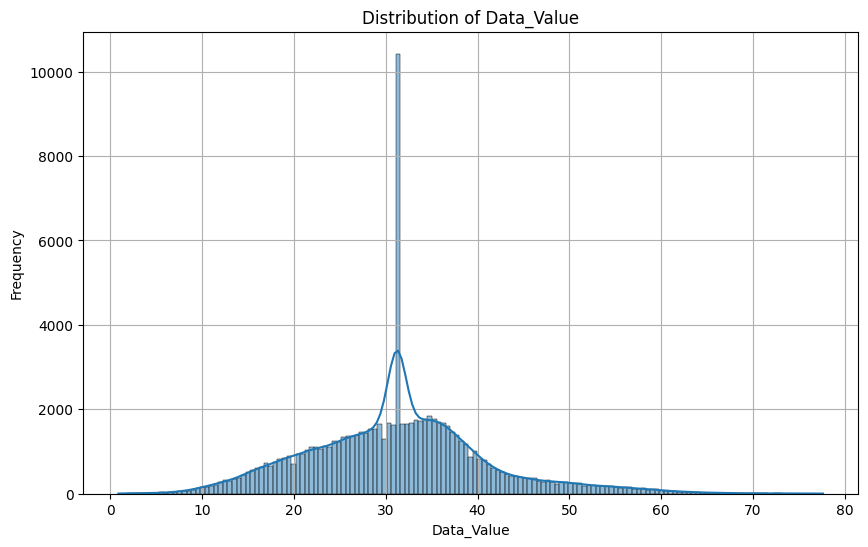

<ipython-input-7-c8a36fd0ed93>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_dropped.corr()


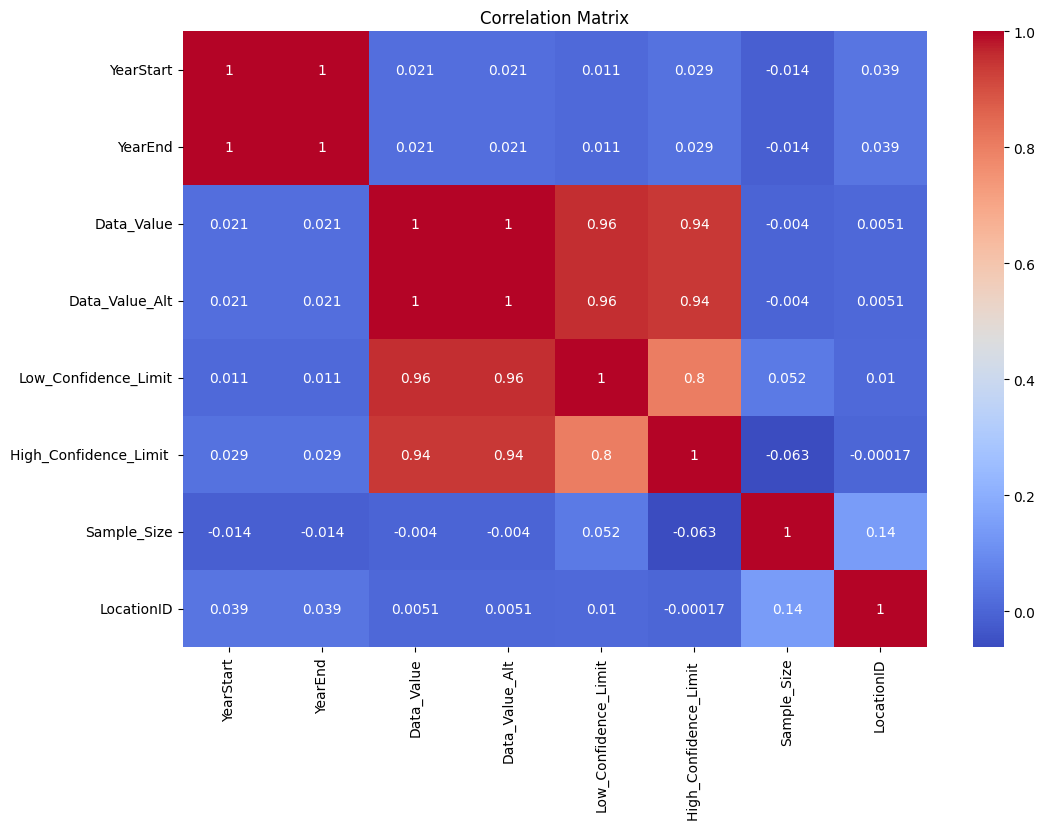

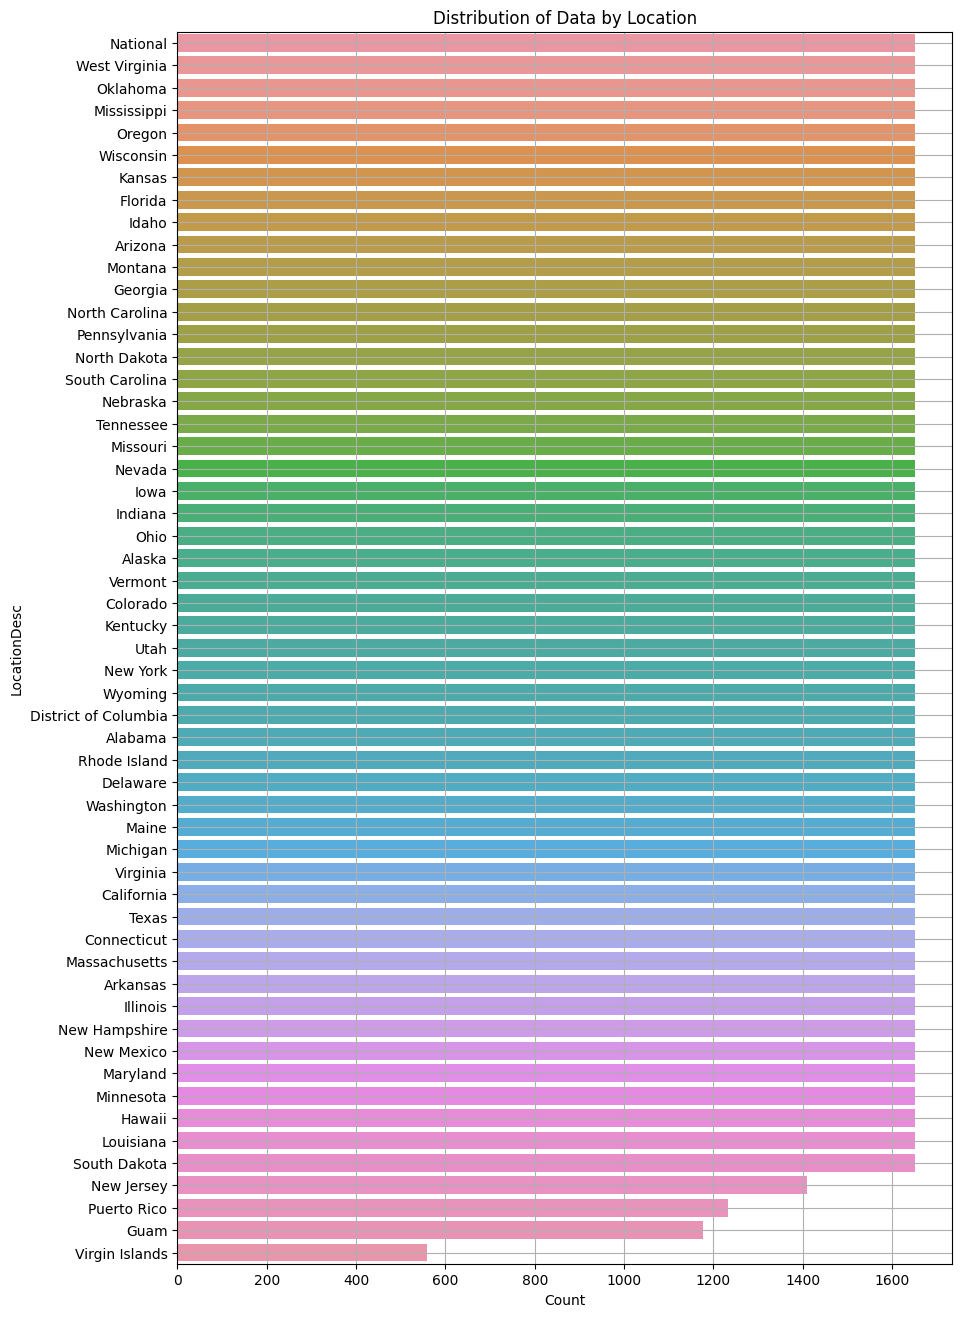

(          YearStart       YearEnd    Data_Value  Data_Value_Alt  \
 count  88629.000000  88629.000000  88629.000000    88629.000000   
 mean    2016.011362   2016.011362     31.236493       31.236493   
 std        3.121080      3.121080      9.599919        9.599919   
 min     2011.000000   2011.000000      0.900000        0.900000   
 25%     2013.000000   2013.000000     25.200000       25.200000   
 50%     2016.000000   2016.000000     31.236493       31.236493   
 75%     2019.000000   2019.000000     36.300000       36.300000   
 max     2021.000000   2021.000000     77.600000       77.600000   
 
        Low_Confidence_Limit  High_Confidence_Limit     Sample_Size  \
 count          88629.000000            88629.000000   88629.000000   
 mean              26.907732               36.135953    3656.809044   
 std                9.404451               10.499523   17755.873057   
 min                0.300000                3.000000      50.000000   
 25%               20.800000   

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Descriptive Statistics
descriptive_stats = data_dropped.describe()

# Distribution Analysis for 'Data_Value' (assuming this is a key variable)
plt.figure(figsize=(10, 6))
sns.histplot(data_dropped['Data_Value'], kde=True)
plt.title('Distribution of Data_Value')
plt.xlabel('Data_Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation Analysis
correlation_matrix = data_dropped.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Categorical Data Analysis for 'LocationDesc' (as an example)
plt.figure(figsize=(10, 16))
sns.countplot(y=data_dropped['LocationDesc'], order=data_dropped['LocationDesc'].value_counts().index)
plt.title('Distribution of Data by Location')
plt.xlabel('Count')
plt.ylabel('LocationDesc')
plt.grid(True)
plt.show()

descriptive_stats, correlation_matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

# Creating a copy of the dataset for feature engineering
data_fe = data_dropped.copy()
# Applying feature engineering

# Combining 'YearStart' and 'YearEnd' into 'Year'
data_fe['Year'] = data_fe['YearStart']
data_fe.drop(['YearStart', 'YearEnd'], axis=1, inplace=True)

# Extracting latitude and longitude from 'GeoLocation'
data_fe['Latitude'] = data_fe['GeoLocation'].str.extract(r'\((.*),.*\)', expand=False).astype(float)
data_fe['Longitude'] = data_fe['GeoLocation'].str.extract(r'\(.*,\s*(.*)\)', expand=False).astype(float)
data_fe.drop('GeoLocation', axis=1, inplace=True)

# Encoding 'LocationDesc' using Label Encoding for memory efficiency
label_encoder = LabelEncoder()
data_fe['LocationDesc'] = label_encoder.fit_transform(data_fe['LocationDesc'])

# Identifying numerical columns excluding 'LocationDesc' or 'LocationID'
numerical_columns = data_fe.select_dtypes(include=['float64', 'int64']).columns.drop(['LocationDesc', 'LocationID', 'Year'])

# Standardizing only the relevant numerical features
scaler = StandardScaler()
data_fe[numerical_columns] = scaler.fit_transform(data_fe[numerical_columns])

# Filtering out non-numeric columns for VarianceThreshold
numeric_data_fe = data_fe.select_dtypes(include=[np.number])

# Applying VarianceThreshold
selector = VarianceThreshold(threshold=0.01)
numeric_data_fe_selected = selector.fit_transform(numeric_data_fe)

# Getting the selected feature names
selected_columns = numeric_data_fe.columns[selector.get_support()]

# Creating a DataFrame with the selected features
numeric_data_fe_selected_df = pd.DataFrame(numeric_data_fe_selected, columns=selected_columns)

numeric_data_fe_selected_df.columns

Index(['LocationDesc', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit',
       'High_Confidence_Limit ', 'Sample_Size', 'LocationID', 'Year',
       'Latitude', 'Longitude'],
      dtype='object')

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA test for variation in Data_Value across different locations (LocationDesc)
model = ols('Data_Value ~ C(LocationDesc)', data=numeric_data_fe_selected_df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq       df         F        PR(>F)
C(LocationDesc)    321.941247     54.0  5.979897  7.069745e-40
Residual         88307.058753  88574.0       NaN           NaN


#Interpretation:
The results suggest that there are significant differences in the 'Data_Value' (used as a proxy for obesity rates) among different locations. This finding can be an important basis for further investigation into how and why these differences exist. It can guide more detailed analyses, such as examining specific locations with higher or lower rates, and exploring potential reasons behind these variations.

Next, you might consider performing additional analyses or exploring the data further to understand the underlying factors contributing to these differences, such as socioeconomic status, access to health facilities, dietary habits, or other variables that might be relevant to your research.

In [ ]:
from sklearn.linear_model import LinearRegression

# Linear Regression with LocationID as a proxy for socioeconomic factor
X = numeric_data_fe_selected_df[['LocationID']].values.reshape(-1, 1)
y = numeric_data_fe_selected_df['Data_Value'].values

model = LinearRegression().fit(X, y)
# You can interpret the model's coefficients to understand the impact


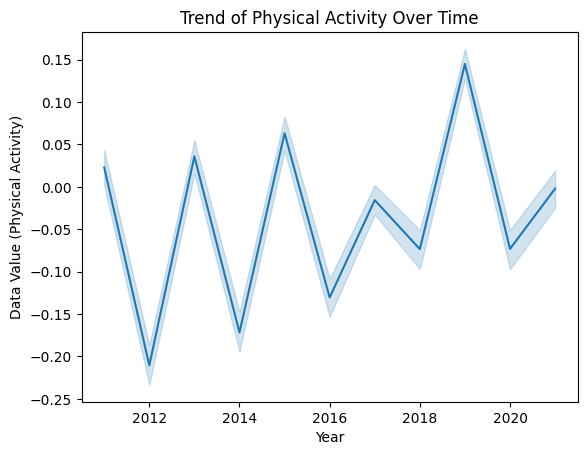

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the trend of Data_Value over Years
sns.lineplot(x='Year', y='Data_Value', data=numeric_data_fe_selected_df)
plt.title('Trend of Physical Activity Over Time')
plt.xlabel('Year')
plt.ylabel('Data Value (Physical Activity)')
plt.show()


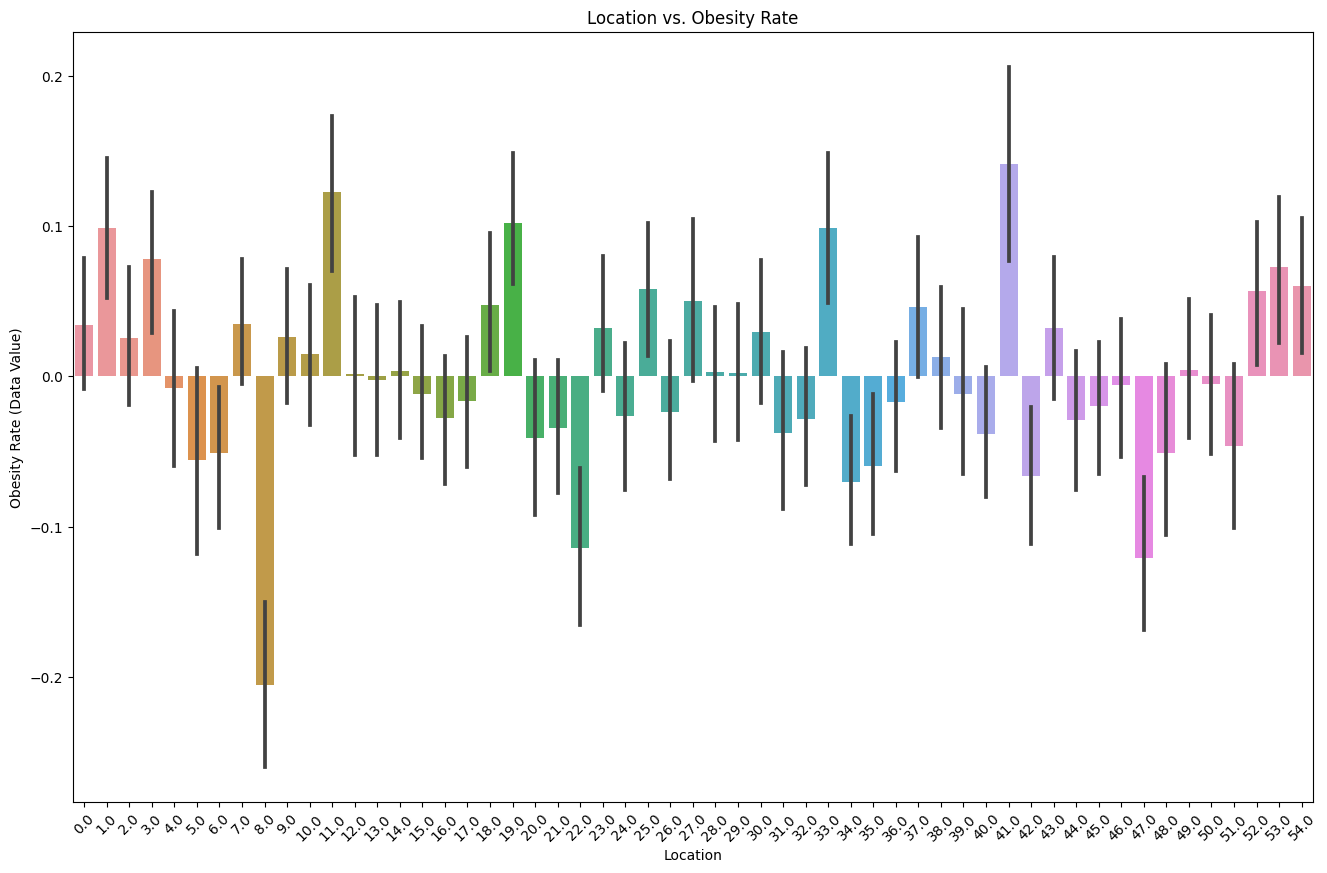

In [ ]:
# Bar plot for LocationDesc vs Data_Value

plt.figure(figsize=(16, 10))
sns.barplot(x='LocationDesc', y='Data_Value', data=numeric_data_fe_selected_df)
plt.title('Location vs. Obesity Rate')
plt.xlabel('Location')
plt.ylabel('Obesity Rate (Data Value)')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


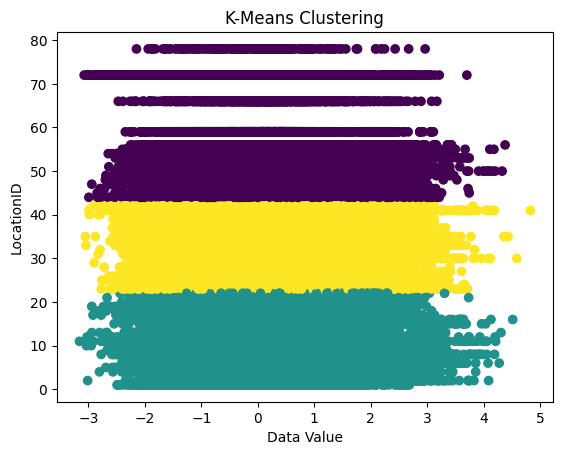

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Selecting features for clustering
features_for_clustering = numeric_data_fe_selected_df[['Data_Value', 'LocationID']]  # Example features

# Applying K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Choose the number of clusters
clusters = kmeans.fit_predict(features_for_clustering)

# Adding cluster information to the DataFrame
numeric_data_fe_selected_df['Cluster'] = clusters

# Visualizing the clusters
plt.scatter(numeric_data_fe_selected_df['Data_Value'], numeric_data_fe_selected_df['LocationID'], c=numeric_data_fe_selected_df['Cluster'])
plt.xlabel('Data Value')
plt.ylabel('LocationID')
plt.title('K-Means Clustering')
plt.show()